# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle


# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    



In [2]:
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
print('Train size -',len(train['features']))
print('Test size -',len(test['features']))


Train size - 39209
Test size - 12630


In [3]:
# Define function to transform images and generate more images

def transform_image(img):
    rows,cols,ch = img.shape
    pts1 = np.float32([[5,5],[20,5],[5,20]])
    pts2 = np.float32([[0,10],[20,5],[10,25]])
    M = cv2.getAffineTransform(pts1,pts2)
    dst = cv2.warpAffine(img,M,(cols,rows))
#     plt.subplot(121),plt.imshow(img),plt.title('Input')
#     plt.subplot(122),plt.imshow(dst),plt.title('Output')
#     plt.show()
    return dst

(array([  210.,  2220.,  2250.,  1410.,  1980.,  1860.,   420.,  1440.,
         1410.,  1470.,  2010.,  1320.,  2100.,  2160.,   780.,   630.,
          420.,  1110.,  1200.,   210.,   360.,   330.,   390.,   510.,
          270.,  1500.,   600.,   240.,   540.,   270.,   450.,   780.,
          240.,   689.,   420.,  1200.,   390.,   210.,  2070.,   300.,
          360.,   240.,   240.]),
 array([  0.        ,   0.97674419,   1.95348837,   2.93023256,
          3.90697674,   4.88372093,   5.86046512,   6.8372093 ,
          7.81395349,   8.79069767,   9.76744186,  10.74418605,
         11.72093023,  12.69767442,  13.6744186 ,  14.65116279,
         15.62790698,  16.60465116,  17.58139535,  18.55813953,
         19.53488372,  20.51162791,  21.48837209,  22.46511628,
         23.44186047,  24.41860465,  25.39534884,  26.37209302,
         27.34883721,  28.3255814 ,  29.30232558,  30.27906977,
         31.25581395,  32.23255814,  33.20930233,  34.18604651,
         35.1627907 ,  36.1395

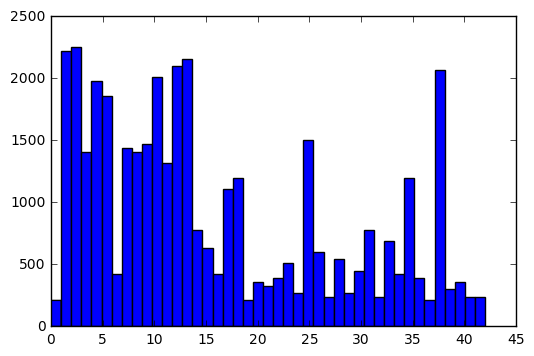

In [4]:
# Plotting histogram showing count of images in each class
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
n_classes = len(np.bincount(y_train))
plt.hist(y_train, bins = n_classes)

In [5]:
# Adding more training images by transforming training set

import cv2
from skimage import data
from skimage import transform
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import random 

class_mean = int(np.mean(np.bincount(y_train)))
num_of_classes = len(np.bincount(y_train))
print(class_mean,num_of_classes)
count_in_class = np.bincount(y_train)
for i in range(num_of_classes):
    if count_in_class[i] < class_mean:
        new_image_needed = class_mean - count_in_class[i]
        index = np.where(y_train == i)
        additional_X = []
        additional_y = []
        for count in range(new_image_needed):
            additional_X.append(transform_image(X_train[index][random.randint(0,count_in_class[i] - 1)]))
            additional_y.append(i)
        print('Additional images',len(additional_X),'for class',i )

        X_train = np.append(X_train, np.array(additional_X), axis=0)
        y_train = np.append(y_train, np.array(additional_y), axis=0)

911 43
Additional images 701 for class 0
Additional images 491 for class 6
Additional images 131 for class 14
Additional images 281 for class 15
Additional images 491 for class 16
Additional images 701 for class 19
Additional images 551 for class 20
Additional images 581 for class 21
Additional images 521 for class 22
Additional images 401 for class 23
Additional images 641 for class 24
Additional images 311 for class 26
Additional images 671 for class 27
Additional images 371 for class 28
Additional images 641 for class 29
Additional images 461 for class 30
Additional images 131 for class 31
Additional images 671 for class 32
Additional images 222 for class 33
Additional images 491 for class 34
Additional images 521 for class 36
Additional images 701 for class 37
Additional images 611 for class 39
Additional images 551 for class 40
Additional images 671 for class 41
Additional images 671 for class 42


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [6]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.bincount(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 52396
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

36


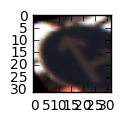

In [7]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()
plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_train[index])




(array([  911.,  2220.,  2250.,  1410.,  1980.,  1860.,   911.,  1440.,
         1410.,  1470.,  2010.,  1320.,  2100.,  2160.,   911.,   911.,
          911.,  1110.,  1200.,   911.,   911.,   911.,   911.,   911.,
          911.,  1500.,   911.,   911.,   911.,   911.,   911.,   911.,
          911.,   911.,   911.,  1200.,   911.,   911.,  2070.,   911.,
          911.,   911.,   911.]),
 array([  0.        ,   0.97674419,   1.95348837,   2.93023256,
          3.90697674,   4.88372093,   5.86046512,   6.8372093 ,
          7.81395349,   8.79069767,   9.76744186,  10.74418605,
         11.72093023,  12.69767442,  13.6744186 ,  14.65116279,
         15.62790698,  16.60465116,  17.58139535,  18.55813953,
         19.53488372,  20.51162791,  21.48837209,  22.46511628,
         23.44186047,  24.41860465,  25.39534884,  26.37209302,
         27.34883721,  28.3255814 ,  29.30232558,  30.27906977,
         31.25581395,  32.23255814,  33.20930233,  34.18604651,
         35.1627907 ,  36.1395

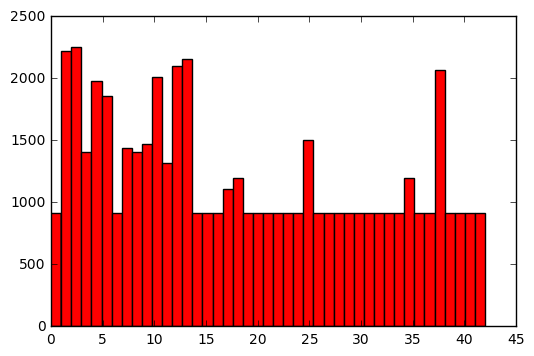

In [8]:
# Plotting histogram showing count of images in each class after adding new transformed images
%matplotlib inline
plt.hist(y_train, bins = n_classes,color = 'red')

In [9]:
# Gray scaling images

from numpy import newaxis
import cv2


def do_grayscale(img_arr):
    new_img_arr = []
    for img in img_arr:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        new_img_arr.append(gray)
        
    return np.array(new_img_arr)


X_train = do_grayscale(X_train)
X_train = X_train[..., newaxis]

X_test = do_grayscale(X_test)
X_test = X_test[..., newaxis]

print(X_train.shape,X_test.shape)

(52396, 32, 32, 1) (12630, 32, 32, 1)


# ----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [10]:
from sklearn.utils import shuffle

### Feel free to use as many code cells as needed.
X_train, y_train = shuffle(X_train, y_train)

In [11]:
import cv2

# TODO: Normalize the data features to the variable X_normalized
def normalize_grayscale(image_data):
    a = -0.5
    b = 0.5
    grayscale_min = 0
    grayscale_max = 255
    return a + ( ( (image_data - grayscale_min)*(b - a) )/( grayscale_max - grayscale_min ) )


X_train = normalize_grayscale(X_train)
X_test = normalize_grayscale(X_test)
print(X_train.shape)

(52396, 32, 32, 1)


In [12]:
# from sklearn.preprocessing import LabelBinarizer
# label_binarizer = LabelBinarizer()
# y_train = label_binarizer.fit_transform(y_train)
# y_test = label_binarizer.fit_transform(y_test)


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
First I converted images to gray scale from RGB  as part of pre-processing
Secondly I shuffled the data. Shuffling helps in reducing overfitting and correlation between two consecutive images. 
I also normalized the images using the  technique explained in one of the Udacity lesson,  this helps scale down some of the disparity within the data..

In [13]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

from sklearn.model_selection import train_test_split
X_train,X_validation,y_train,y_validation = train_test_split(X_train,y_train,test_size = .2, random_state = 0)
print('Train-',len(X_train),'Validation-',len(X_validation))

assert(len(X_train) == len(y_train))
assert(len(X_validation) == len(y_validation))
assert(len(X_test) == len(y_test))


Train- 41916 Validation- 10480


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:** 
I checked the histogram for the training data set and found that images in different classes vary significantly, so I decided to add more images to these classes and make the count of images in each classes  atleast mean of the counts across all classes. Having very less training sample for any class make the model imbalance and add overfitting.
To add images I simply used existing image for a class and added corresponding affine transformed images .

Test - I am using given test dataset

Train - I splitted the shuffled train dataset, using sklearn's train_test_split method, into 80:20 and used 80% as train dataset

Validation - Remaining 20% is being used as validation set


In [14]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf

EPOCHS = 50
BATCH_SIZE = 128

In [15]:
# Main Lenet function definition 

from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.05
    keep_prob = 0.6
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # dropout to the neural network
    # conv1 = tf.nn.dropout(conv1, keep_prob)
    
    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # dropout to the neural network
    #conv2 = tf.nn.dropout(conv2, keep_prob)
    
    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 64.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 64), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(64))
    fc3 = tf.matmul(fc2, fc3_W) + fc3_b
    
    # SOLUTION: Activation.
    fc3    = tf.nn.relu(fc3)
    
    # SOLUTION: Layer 5: Fully Connected. Input = 64. Output = 43.
    fc4_W  = tf.Variable(tf.truncated_normal(shape=(64, 43), mean = mu, stddev = sigma))
    fc4_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc3, fc4_W) + fc4_b
    
    return logits

In [16]:
#Features and Labels
#x is a placeholder for a batch of input images. y is a placeholder for a batch of output labels.

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
I am using LeNet architecture which is a CNN and works will with images. It takes a 32x32x1 gray scale image and goes through multiple layers. There are two convolutional layer, each of these layer are followed by subsampling layer which use max pooling. After these layer, there are three fully connected layers which use flatten data from previous layers and in the end there is a output layer with 43 classes. 

I tried dropout layer also but that did not change the performance much so skipped it. 

I am using RELU activation function here. Adam Optimizer is used for optimization and loss minimization.

Sizes for each layer input and output is given in the comment before the layer implementation. 

In [17]:
### Train your model here.
### Feel free to use as many code cells as needed.

rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)


In [18]:
# Model Evaluation
# Evaluate how well the loss and accuracy of the model for a given dataset.

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [19]:
# Train the model
# Run the training data through the training pipeline to train the model.

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'lenet')
    print("Model saved")
    
    
# 0.961 - 20,128
# 0.951 - 10,64
# 0.943 - 10,256
# 0.961 - 20,256
# 0.967 - 50,128
# 0.985 - 50,128

Training...

EPOCH 1 ...
Validation Accuracy = 0.264

EPOCH 2 ...
Validation Accuracy = 0.577

EPOCH 3 ...
Validation Accuracy = 0.723

EPOCH 4 ...
Validation Accuracy = 0.834

EPOCH 5 ...
Validation Accuracy = 0.871

EPOCH 6 ...
Validation Accuracy = 0.890

EPOCH 7 ...
Validation Accuracy = 0.907

EPOCH 8 ...
Validation Accuracy = 0.931

EPOCH 9 ...
Validation Accuracy = 0.935

EPOCH 10 ...
Validation Accuracy = 0.940

EPOCH 11 ...
Validation Accuracy = 0.950

EPOCH 12 ...
Validation Accuracy = 0.958

EPOCH 13 ...
Validation Accuracy = 0.962

EPOCH 14 ...
Validation Accuracy = 0.964

EPOCH 15 ...
Validation Accuracy = 0.964

EPOCH 16 ...
Validation Accuracy = 0.961

EPOCH 17 ...
Validation Accuracy = 0.969

EPOCH 18 ...
Validation Accuracy = 0.971

EPOCH 19 ...
Validation Accuracy = 0.967

EPOCH 20 ...
Validation Accuracy = 0.972

EPOCH 21 ...
Validation Accuracy = 0.973

EPOCH 22 ...
Validation Accuracy = 0.974

EPOCH 23 ...
Validation Accuracy = 0.965

EPOCH 24 ...
Validation Accura

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
I checked the histogram for the training data set and found that images in different classes vary significantly, so I decided to add more images to these classes and make the count of images in each classes atleast mean of the counts across all classes. Having very less training sample for any class make the model imbbalance and add overfitting. 

I am using AdamOptimizer for optimization which performs better than Gradient descent optimizer in this case.

After tuning and experimenting with various values of different hyperparameters and other inputs I am using following values for best accuracy- 

EPOCHS = 50,
BATCH_SIZE = 128,
mu = 0,
sigma = 0.05,
keep_prob = 0.6,
training rate = 0.001

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
LeNet suits for this problem as it is multi layered and  feed features from one layer to next after branching and works well with image data. Different  stages at the connected layers provide better  local and global extracts. 

I followed LeNet architecture for this problem  with multiple  experiments on hyper parameters and usage of dropout.  To tune the hyperparameters, I tried with  different  EPOCH(10,20,50), batch size(64,128,256) along with different values for hyperparameters like mu, sigma and keep_prob and checked accuracy against valudation data set. Training and test data was converted to gray scale and normalized before training the model. One-Hot Encoding was used to convert label numbers to vectors. One more reason for using Lenet is its easiness to train even on a decent laptop.

I am using AdamOptimizer for optimization which performs better than Gradient descent optimizer in this case. I used ReLU  as activation function as it allows sparsity and provide reduced likelihood of vanishing gradient. 

I used batched data to train the model and compare the predicted label with original labels, accuracy for each batch was combined to provide accuracy for the model. Once model was trained and stored , I ran it for test data set and checked the accuracy.

In [20]:
# Evaluate the performance of the model on the test set.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.912


---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

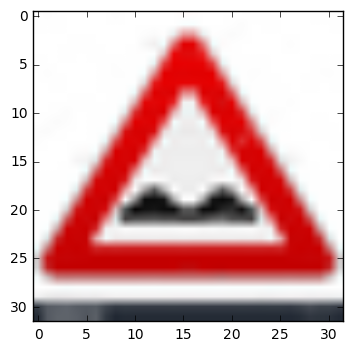

(32, 32, 1)


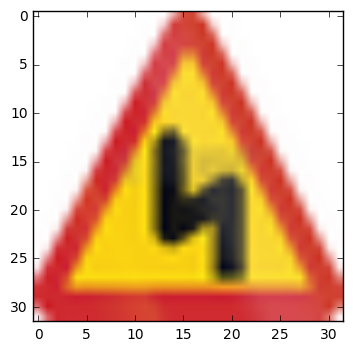

(32, 32, 1)


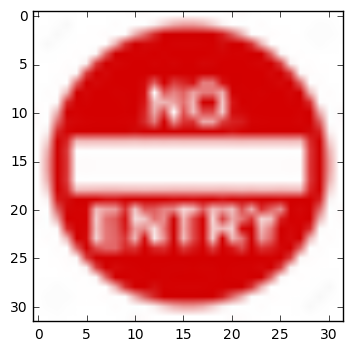

(32, 32, 1)


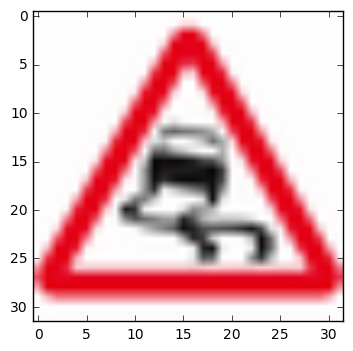

(32, 32, 1)


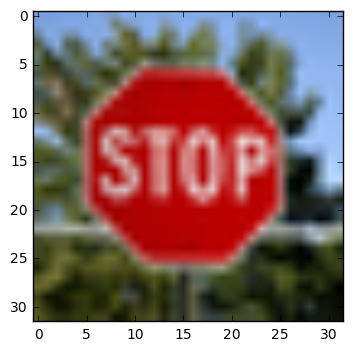

(32, 32, 1)


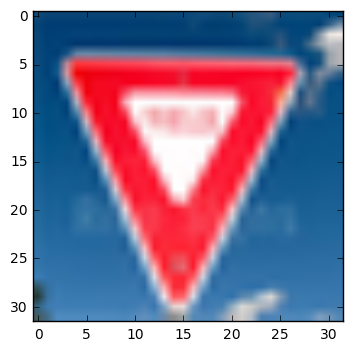

(32, 32, 1)


In [73]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
from PIL import Image
from numpy import array
import glob, os
import matplotlib.pyplot as plt

size = 32, 32
i = 0
X_test_new = []

for infile in glob.glob("new images/*"):
    file, ext = os.path.splitext(infile)
    im = Image.open(infile)
    img = im.resize((32, 32), Image.ANTIALIAS)
    plt.imshow(img)
    plt.show()
    
    img = np.array(img)
    img = transform_image(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = img[..., newaxis]
    print(img.shape)
    X_test_new.append(img)
    

y_test_new = [22,19,17,23,14,13]
plt.show()

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:** I picked six images for this part of experiment. Main difficulty with these new images can be that they are captured in different atmosphere as compared to existing train/test data set. I plotted them also for visualization.

In [76]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test_new, y_test_new)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.500


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**
I believe my model did not perform well in the real world situation. For new images accuracy (50.00%) is significantly lower than the provided data set. It can be due to small test set size(6), different atmosphere and method of capturing images. Original train/test data set is quite curated and captured for this experiment and these new 6 images is quite all different, that  can also be a reason of big differnce between  accuracy(91% vs 50%).

In [77]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    classes = sess.run(logits, feed_dict={x: X_test_new})
    predicts = sess.run(tf.nn.top_k(classes, k=3, sorted=True))
    
    
print('\nActual labels:',y_test_new,'\n')
for i in range(len(predicts[0])):
    print('Image:', i, 'top 3 probabilities:', predicts[0][i], 'corresponding top 3 predicted classes:', predicts[1][i])

    


Actual labels: [22, 19, 17, 23, 14, 13] 

Image: 0 top 3 probabilities: [ 5084.74414062  1695.8371582    631.99047852] corresponding top 3 predicted classes: [15 23 29]
Image: 1 top 3 probabilities: [ 1925.48461914  -564.31976318  -958.33630371] corresponding top 3 predicted classes: [23 26 21]
Image: 2 top 3 probabilities: [ 5427.18457031  3288.60693359  3229.8894043 ] corresponding top 3 predicted classes: [14 34 17]
Image: 3 top 3 probabilities: [ 8819.66113281  5793.85644531   504.85690308] corresponding top 3 predicted classes: [23 19 26]
Image: 4 top 3 probabilities: [ 6539.27832031  1070.2689209    450.44760132] corresponding top 3 predicted classes: [14 17 33]
Image: 5 top 3 probabilities: [ 10084.11035156   9975.47558594   7376.96191406] corresponding top 3 predicted classes: [13  9  3]


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**
I am  using  tf.nn.top_k for softmax values for new images with k= 3 for top three probabilities. In all of the above cases,  our LeNet network predict first choice with highest probability. If the model is incorrect intially then it does not goes and correct its prediction.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.